### Uploading and showing data

In [1]:
import pandas as pd
columns = ["col1", "col2", "complexAge", "totalRooms", "totalBedrooms", "complexInhabitants", "apartmentsNr", "col8", "medianCompexValue"]
df = pd.read_csv("apartmentComplexData.txt", names=columns)
df.head()

col1   col2  complexAge  totalRooms  totalBedrooms  complexInhabitants  \
0 -122.23  37.88        41.0       880.0          129.0               322.0   
1 -122.22  37.86        21.0      7099.0         1106.0              2401.0   
2 -122.24  37.85        52.0      1467.0          190.0               496.0   
3 -122.25  37.85        52.0      1274.0          235.0               558.0   
4 -122.25  37.85        52.0      1627.0          280.0               565.0   

   apartmentsNr    col8  medianCompexValue  
0         126.0  8.3252           452600.0  
1        1138.0  8.3014           358500.0  
2         177.0  7.2574           352100.0  
3         219.0  5.6431           341300.0  
4         259.0  3.8462           342200.0

#### Spliting data

In [2]:
X = df.iloc[:, 2:7]
Y = df.iloc[:,8]

In [3]:
#checking data for Nan values
df.isnull().sum()

col1                  0
col2                  0
complexAge            0
totalRooms            0
totalBedrooms         0
complexInhabitants    0
apartmentsNr          0
col8                  0
medianCompexValue     0
dtype: int64

### Visualising data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, nrows=2)
fig.set_figheight(10)
fig.set_figwidth(20)

i = 0
j = 0

for col in columns[2:7]:
    sns.regplot(data=df, x=col, y='medianCompexValue', ax=axes[i][j])
    j+=1
    if j==3:
        j = 0
        i += 1

### Preparing data for training and testing

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

### Creating and training linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

#get constant and coeficient for linear regression
constant = lr.intercept_
coeficients = lr.coef_

print(f"Constant: {constant}")
print(f"Regression coeficients: {coeficients}")

Constant: 145009.6572734912
Regression coeficients: [1637.0661736    46.34709975 -286.455056    -62.05917668  270.60016764]


### Predicting data

In [7]:
y_pred = lr.predict(X_test)

df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_pred_head = df_pred.head(15)
df_pred_head

Actual      Predicted
20046   47700.0  161318.777437
3024    45800.0  191769.869422
15663  500001.0  259805.256390
20484  218600.0  197721.167035
9814   278000.0  233439.680995
13311  158700.0  213540.923222
7113   198200.0  216572.166805
7668   157500.0  198360.841722
18246  340000.0  177348.528111
5723   446600.0  261716.640722
20069  123200.0  194967.714395
6835   253900.0  189290.429120
11351  215100.0   30332.535342
20267  220500.0  112201.523139
7097   219800.0  236087.429989

### Visualising predicted data based on liniar regression

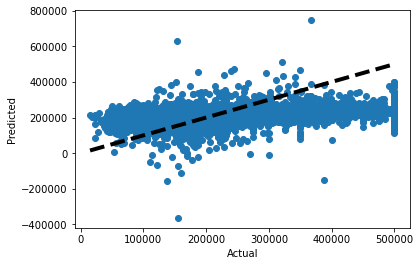

In [8]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

### Performance evaluation

In [9]:
from sklearn import metrics
import numpy as np

print(f"Accuracy: {metrics.r2_score(y_test, y_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

Accuracy: 0.1589948299934283
MAE: 82573.85898356892
MSE: 11207166061.103449
RMSE:105863.90348510417


---
### Normalizing X values

In [10]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)

X_train, X_test, y_train, y_test = train_test_split(normalized_X, Y, test_size=0.33, random_state=42)

lr_normal = LinearRegression()
lr_normal.fit(X_train, y_train)

#get constant and coeficient for linear regression
constant = lr_normal.intercept_
coeficients = lr_normal.coef_

print(f"Constant: {constant}")
print(f"Regression coeficients: {coeficients}")

y_pred_normal = lr_normal.predict(X_test)


df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Predicted after normalization': y_pred_normal})
df_pred_head = df_pred.head(15)
df_pred_head

Constant: 1517147.4598211758
Regression coeficients: [ -459278.3074943   -891657.71095295 -1779428.05350428 -1037363.66524303
  1460243.87479122]


Actual      Predicted  Predicted after normalization
20046   47700.0  161318.777437                  132520.875812
3024    45800.0  191769.869422                  171994.696490
15663  500001.0  259805.256390                  260398.360255
20484  218600.0  197721.167035                  207354.871619
9814   278000.0  233439.680995                  244320.306644
13311  158700.0  213540.923222                  226744.153655
7113   198200.0  216572.166805                  210046.168789
7668   157500.0  198360.841722                  141546.487198
18246  340000.0  177348.528111                  257165.098826
5723   446600.0  261716.640722                  269994.353022
20069  123200.0  194967.714395                  164244.909058
6835   253900.0  189290.429120                  167740.158342
11351  215100.0   30332.535342                  105028.965510
20267  220500.0  112201.523139                  123414.458556
7097   219800.0  236087.429989                  232118.927365

### Performance evaluation

In [11]:
print(f"Accuracy: {metrics.r2_score(y_test, y_pred_normal)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred_normal)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred_normal)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_pred_normal))}")

Accuracy: 0.24879252792528994
MAE: 78518.14866416431
MSE: 10010529288.20547
RMSE:100052.63259007965


### Visualising predicted data after normalization

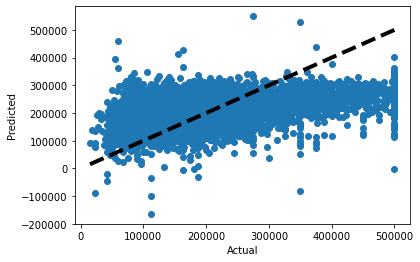

In [12]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_normal)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

---
### Increasing accuracy

In [13]:
# getting correlation between data
df.corr()

col1      col2  complexAge  totalRooms  totalBedrooms  \
col1                1.000000 -0.924664   -0.108197    0.044568       0.068378   
col2               -0.924664  1.000000    0.011173   -0.036100      -0.066318   
complexAge         -0.108197  0.011173    1.000000   -0.361262      -0.320485   
totalRooms          0.044568 -0.036100   -0.361262    1.000000       0.929893   
totalBedrooms       0.068378 -0.066318   -0.320485    0.929893       1.000000   
complexInhabitants  0.099773 -0.108785   -0.296244    0.857126       0.878026   
apartmentsNr        0.055310 -0.071035   -0.302916    0.918484       0.979829   
col8               -0.015176 -0.079809   -0.119034    0.198050      -0.008093   
medianCompexValue  -0.045967 -0.144160    0.105623    0.134153       0.050594   

                    complexInhabitants  apartmentsNr      col8  \
col1                          0.099773      0.055310 -0.015176   
col2                         -0.108785     -0.071035 -0.079809   
complexAge                   -0.296244     -0.302916 -0.119034   
totalRooms                    0.857126      0.918484  0.198050   
totalBedrooms                 0.878026      0.979829 -0.008093   
complexInhabitants            1.000000      0.907222  0.004834   
apartmentsNr                  0.907222      1.000000  0.013033   
col8                          0.004834      0.013033  1.000000   
medianCompexValue            -0.024650      0.065843  0.688075   

                    medianCompexValue  
col1                        -0.045967  
col2                        -0.144160  
complexAge                   0.105623  
totalRooms                   0.134153  
totalBedrooms                0.050594  
complexInhabitants          -0.024650  
apartmentsNr                 0.065843  
col8                         0.688075  
medianCompexValue            1.000000

### Visualising data for the most correlated column

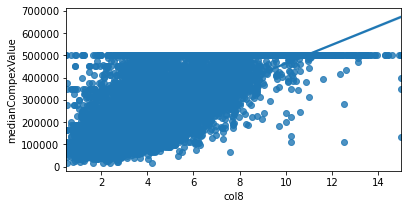

In [14]:
fig, axes = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(6)


sns.regplot(data=df, x='col8', y='medianCompexValue')

### Recompute the regression by adding col8

#### Spliting the data

In [15]:
X = df.iloc[:, 2:8]
Y = df.iloc[:,8]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lr_2 = LinearRegression()
lr_2.fit(X_train, y_train)

#get constant and coeficient for linear regression
constant = lr_2.intercept_
coeficients = lr_2.coef_

print(f"Constant: {constant}")
print(f"Regression coeficients: {coeficients}")

y_pred_2 = lr_2.predict(X_test)


df_pred = pd.DataFrame({'Actual': y_test, 'Predicted with col8': y_pred_2})
df_pred_head = df_pred.head(15)
df_pred_head

Constant: -46877.77657293726
Regression coeficients: [ 1.88580679e+03 -1.97910476e+01  1.03772661e+02 -3.40467894e+01
  1.19221118e+02  4.77004874e+04]


Actual      Predicted
20046   47700.0   84167.743389
3024    45800.0  160867.070548
15663  500001.0  330103.952601
20484  218600.0  251854.640995
9814   278000.0  208890.089635
13311  158700.0  217122.661081
7113   198200.0  264952.587877
7668   157500.0  201327.859252
18246  340000.0  241096.895229
5723   446600.0  422738.260306
20069  123200.0  135735.051653
6835   253900.0  195721.927795
11351  215100.0  125975.551672
20267  220500.0  148110.901239
7097   219800.0  250518.142226

### Performance evolution

In [17]:
print(f"Accuracy: {metrics.r2_score(y_test, y_pred_2)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred_2)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred_2)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))}")

Accuracy: 0.5680761558206975
MAE: 55705.46182061873
MSE: 5755781795.526641
RMSE:75866.8688923343


### Visualising predicted data

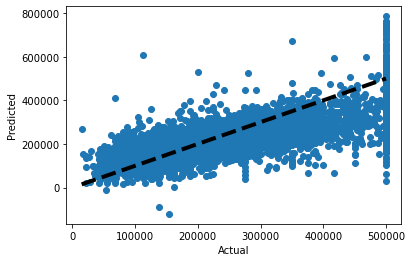

In [18]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_2)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

---
### Recompute regression using all columns

In [19]:
X = df.iloc[:, 0:8]
Y = df.iloc[:,8]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lr_3 = LinearRegression()
lr_3.fit(X_train, y_train)

#get constant and coeficient for linear regression
constant = lr_3.intercept_
coeficients = lr_3.coef_

print(f"Constant: {constant}")
print(f"Regression coeficients: {coeficients}")

y_pred_3 = lr_3.predict(X_test)


df_pred = pd.DataFrame({'Actual': y_test, 'Predicted with col8': y_pred_2, 'Predicted with all': y_pred_3})
df_pred_head = df_pred.head(15)
df_pred_head

Constant: -3594782.29530269
Regression coeficients: [-4.27684012e+04 -4.24134956e+04  1.16900118e+03 -8.12850567e+00
  1.20541801e+02 -3.69519818e+01  3.73799081e+01  4.02932160e+04]


Actual  Predicted with all  Predicted with col8
20046   47700.0        56608.134767         84167.743389
3024    45800.0       185080.389747        160867.070548
15663  500001.0       333679.413748        330103.952601
20484  218600.0       271380.508615        251854.640995
9814   278000.0       267271.845702        208890.089635
13311  158700.0       199682.853496        217122.661081
7113   198200.0       263779.326484        264952.587877
7668   157500.0       205618.970867        201327.859252
18246  340000.0       276099.561888        241096.895229
5723   446600.0       391760.707053        422738.260306
20069  123200.0        82424.719002        135735.051653
6835   253900.0       187365.253638        195721.927795
11351  215100.0       123908.026016        125975.551672
20267  220500.0       193120.160908        148110.901239
7097   219800.0       252947.651114        250518.142226

### Performance evolution

In [20]:
print(f"Accuracy: {metrics.r2_score(y_test, y_pred_3)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred_3)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred_3)}")
print(f"RMSE:{np.sqrt(metrics.mean_squared_error(y_test, y_pred_3))}")

Accuracy: 0.6378669755308577
MAE: 50826.47741444403
MSE: 4825755044.292537
RMSE:69467.65466238612


### Visualising predicted data

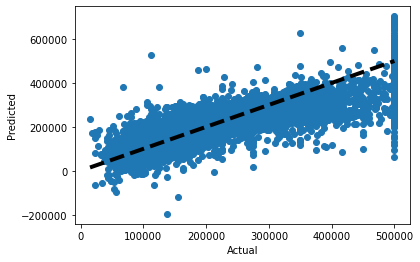

In [21]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_3)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()